<a href="https://colab.research.google.com/github/Ipal23/LSTM-Neural-Network-Bitcoin-Stock-prediction/blob/main/Bitcoin_Prediction_with_the_use_of_an_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1. The prediction of the Bitcoin Stock Price with the use of an Long-Short-Term-Memory Neural Network.

In case that you are tracking artificial intelligence , you have certainly read about Neural Networks. They have gained traction due to the fact that they perform extraordinarily well on a lot of different problems. They also have great ability to handle incomplete data.  Deep learning is an important topic nowadays. 

Individuals can be empowered to make decisions based on statistical analysis and may lean on the intuition the prediction provides. 
Long Short Term Memory networks were introduced by  Hochreiter & Schmidhuber(1997).
The stock market industry is producing huge amounts of data which need to be mined to discover hidden information for effective decision making in terms of shareholder purchases and sales. 
LSTMs are designed to avoid issues such as the long-term dependency problem. Recalling information for long periods of time refer to their default behavior. 
The preparation of independent variables was one of the major challenges faced.

Input Date
Choosing the proper set of independent variables is of utmost importance for accurate forecasting. The data used in this paper work were historical daily stock prices. 
In this study the closing price is chosen to be modeled and predicted. 
In terms of Time Series and econometric methods, MSE is considered an acceptable measure of performance. 







In [ ]:
# Author Iliana Paliari

#The below code depicts the creation of an LSTM Neural Network for the prediction of the Bitcoin Stock prices.


import pandas as pd
from google.colab import files

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import backend as K

import keras
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

from keras import optimizers
import tensorflow as tf

# Dataset is now stored in a Pandas Dataframe

uploaded = files.upload()


import io
df = pd.read_csv(io.BytesIO(uploaded['BCHAIN-MKPRU.csv']))

In [ ]:
#Display first values
df.head()

,Date,Value
0,2021-03-06,48861.38
1,2021-03-05,48448.91
2,2021-03-04,50477.70
3,2021-03-03,48356.04
4,2021-03-02,49618.43


In [ ]:
#Convert df to Dataframe
df = pd.DataFrame(df, columns=['Date', 'Value'])
print(df)

            Date     Value
0     2021-03-06  48861.38
1     2021-03-05  48448.91
2     2021-03-04  50477.70
3     2021-03-03  48356.04
4     2021-03-02  49618.43
...          ...       ...
4442  2009-01-06      0.00
4443  2009-01-05      0.00
4444  2009-01-04      0.00
4445  2009-01-03      0.00
4446  2009-01-02      0.00

[4447 rows x 2 columns]


In [ ]:
#Data preparation
columns_to_view = ['Value']
df = df[columns_to_view]
df.index.names = ['Date']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 4447


,Value
Date,
0,48861.38
1,48448.91
2,50477.70
3,48356.04
4,49618.43


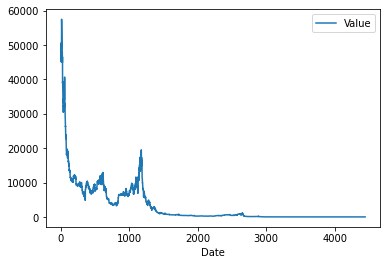

In [ ]:
# Display plot diagram
df.plot()

In [ ]:
#Additional Data checks
df.isnull().sum()
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
#Additional Data checks
null_columns=df.columns[df.isnull().any()]

In [ ]:
#Additional Data checks
df.isnull().sum()

Value    0
dtype: int64

In [ ]:
print(df[df.isnull().any(axis=1)][null_columns].head())
df.dropna(inplace=True)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#Print the Min and the Max value
print('Min', np.min(df))
print('Max', np.max(df))

Min Value    0.0
dtype: float64
Max Value    57487.86
dtype: float64


In [ ]:
df.values.tolist()

[[48861.38],
 [48448.91],
 [50477.7],
 [48356.04],
 [49618.43],
 [45113.92],
 [46155.87],
 [46340.31],
 [46800.42],
 [50624.84],
 [48880.43],
 [54123.4],
 [57487.86],
 [56001.2],
 [55916.5],
 [51608.15],
 [52118.23],
 [49160.1],
 [47951.85],
 [48720.37],
 [47185.19],
 [47471.4],
 [48013.38],
 [44878.17],
 [46589.58],
 [46364.3],
 [38928.1],
 [39323.26],
 [38278.61],
 [37002.09],
 [37676.25],
 [35529.66],
 [33522.9],
 [33136.46],
 [34318.1],
 [34314.26],
 [33403.17],
 [30419.17],
 [32541.8],
 [32243.26],
 [32276.84],
 [32099.74],
 [33002.38],
 [30797.88],
 [35538.98],
 [36020.13],
 [36632.35],
 [35793.01],
 [36065.2],
 [36828.52],
 [39158.47],
 [37393.13],
 [34011.82],
 [35544.94],
 [38240.09],
 [40240.72],
 [40670.25],
 [39486.04],
 [36860.41],
 [34046.67],
 [32035.03],
 [33000.78],
 [32195.46],
 [29393.75],
 [28982.56],
 [28856.59],
 [27376.37],
 [27036.69],
 [26246.58],
 [26443.21],
 [24693.58],
 [23715.53],
 [23253.37],
 [23824.99],
 [22745.48],
 [23490.58],
 [23869.92],
 [23150.79]

In [ ]:
df.dtypes

Value    float64
dtype: object

In [ ]:
df['Value'] = pd.to_numeric(df['Value'],errors='coerce')

In [ ]:
dataset = df.astype('float64')

In [ ]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #The target is always the next value. And the lookback are the previous prices
        a = dataset[i:(i+look_back), 0]        
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :][0])#Isolate the target with [0] it must be 1st
       
    return np.array(dataX), np.array(dataY)

In [ ]:
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [ ]:
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e0c242c50>]],
      dtype=object)

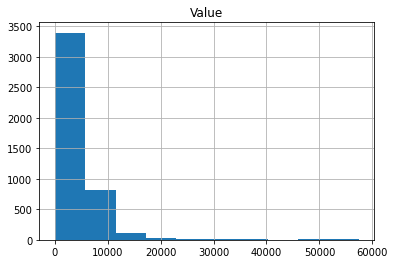

In [ ]:
df.hist(bins=10)

In [ ]:
len(df[df['Value'] == 0])

591

In [ ]:
print(scaled[:10])

[[0.84994258]
 [0.84276767]
 [0.87805843]
 [0.8411522 ]
 [0.86311145]
 [0.7847556 ]
 [0.8028803 ]
 [0.80608862]
 [0.81409223]
 [0.88061793]]


In [ ]:
#split into train and test sets
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))


train: 3112
test: 1335
